In [64]:
from preparing_script import agrofiz_plot, SVD_vis, Kvu, ob_ves_plot, eroz_vis, agrofiz_plot_by_groups,aov_by_group
import pandas as pd 
import numpy as np 
import scipy 
from scipy.stats import f_oneway as ANOVA

import seaborn as sns 
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
agrofiz = pd.read_csv('data/Агрофизика все объекты.csv')
agrofiz.head(10)

,region,Год,Тип обработки,GPS №,"СВД, мм","СВД агроном. цен., мм","Эрозионно опасные (<1 мм), %",повторность,"СВД водоустойчивые 10-7, мм","СВД водоустойчивые 5-3, мм","СВД водоустойчивые 7-5, мм","СВД водоустойчивые >10, мм","Эрозионно опасные 10-7 (<1 мм), %","Эрозионно опасные 5-3 (<1 мм), %","Эрозионно опасные 7-5 (<1 мм), %","Эрозионно опасные >10 (<1 мм), %"
0,Курск,2019,ПП,__,9.106996,1.460856,2.861062,1,1.349375,0.854937,1.147437,0.950000,75.30,80.75,70.55,76.60
1,Курск,2019,ПП,__,8.386025,1.532257,6.685393,2,2.030312,0.872875,1.215250,2.726813,61.45,78.90,69.60,60.85
2,Курск,2019,ПП,__,8.300786,1.915038,2.691599,3,3.213000,1.106500,1.519563,2.745750,16.60,69.20,62.25,49.00
3,Курск,2019,ПП,__,9.825944,1.119489,2.838208,4,2.202875,0.886250,1.341687,6.431375,59.70,81.80,67.15,41.10
4,Курск,2019,ПП,__,8.849472,1.716434,1.738650,5,1.791562,0.800313,1.141625,3.687813,63.65,80.65,72.10,50.45
5,Курск,2019,ТТ,__,9.826951,1.061199,3.869919,1,2.411312,1.029688,1.635375,4.972812,51.45,74.75,58.10,48.05
6,Курск,2019,ТТ,__,6.609721,2.027766,5.425074,2,1.606812,1.162875,1.255813,2.429000,65.65,65.90,70.05,70.40
7,Курск,2019,ТТ,__,10.358241,0.866819,2.561705,3,3.214500,0.905375,1.502250,8.581500,49.80,76.10,64.20,19.60
8,Курск,2019,ТТ,__,8.622014,1.540706,2.405383,4,2.759813,1.192813,1.766063,4.915313,55.05,71.45,56.25,36.45
9,Курск,2019,ТТ,__,7.898253,1.710809,2.438143,5,3.397750,1.076938,1.722437,5.246750,51.60,66.75,59.35,49.80


## Урожайное 2017/2022 год точки XX/XVIII

In [18]:
agrofiz_urozaynoe = agrofiz[
    (agrofiz["region"] == 'урожайное') & 
    agrofiz['GPS №'].isin(['XX', 'XVIII'])
    ]
agrofiz_urozaynoe

,region,Год,Тип обработки,GPS №,"СВД, мм","СВД агроном. цен., мм","Эрозионно опасные (<1 мм), %",повторность,"СВД водоустойчивые 10-7, мм","СВД водоустойчивые 5-3, мм","СВД водоустойчивые 7-5, мм","СВД водоустойчивые >10, мм","Эрозионно опасные 10-7 (<1 мм), %","Эрозионно опасные 5-3 (<1 мм), %","Эрозионно опасные 7-5 (<1 мм), %","Эрозионно опасные >10 (<1 мм), %"
20,урожайное,2017,ПП,XX,8.748902,1.772273,6.121212,1,2.074631,0.954650,1.346756,2.906325,54.865,70.020,58.645,51.880
21,урожайное,2017,ПП,XX,10.750677,1.066469,2.919049,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,урожайное,2017,ПП,XX,10.264115,1.351475,4.101124,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,урожайное,2017,ПП,XX,9.728741,2.015178,2.943581,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,урожайное,2017,ПП,XX,11.493615,0.709160,2.321655,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,урожайное,2017,ТТ,XVIII,9.759188,1.128956,5.359877,1,2.022062,0.953981,1.317087,3.931800,59.630,65.965,64.790,51.220
26,урожайное,2017,ТТ,XVIII,8.293232,2.170462,5.987261,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,урожайное,2017,ТТ,XVIII,7.678084,2.951565,5.703658,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,урожайное,2017,ТТ,XVIII,9.379651,1.783679,4.569006,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,урожайное,2017,ТТ,XVIII,9.632530,1.645859,4.029304,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### СВД

СВДмм ~ Типобработки * Год


,df,sum_sq,mean_sq,F,PR(>F)
Типобработки,1.0,0.995530,0.995530,0.773549,0.392140
Год,1.0,0.250748,0.250748,0.194837,0.664828
Типобработки:Год,1.0,3.219709,3.219709,2.501785,0.133281
Residual,16.0,20.591437,1.286965,NaN,NaN


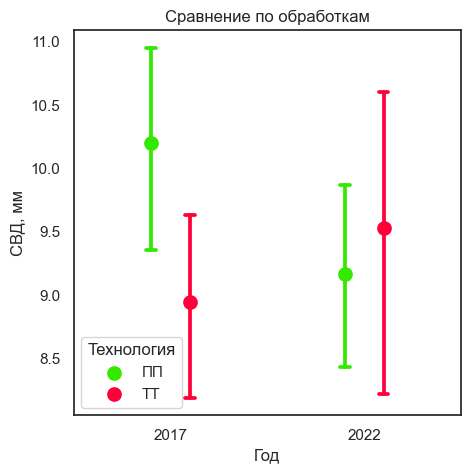

In [19]:
stats, aov, fig = agrofiz_plot_by_groups(agrofiz_urozaynoe,'СВД, мм','Год')
stats
aov

In [20]:
stats

СВД, мм                     
                         sem       std       mean
Год  Тип обработки                               
2017 ПП             0.464141  1.037850  10.197210
     ТТ             0.409532  0.915742   8.948537
2022 ПП             0.432586  0.967291   9.170809
     ТТ             0.677715  1.515418   9.527056

### СВД агроном. цен., мм

СВДагрономценмм ~ Типобработки * Год


,df,sum_sq,mean_sq,F,PR(>F)
Типобработки,1.0,0.075958,0.075958,0.216983,0.647626
Год,1.0,0.050047,0.050047,0.142965,0.710320
Типобработки:Год,1.0,0.924240,0.924240,2.640216,0.123722
Residual,16.0,5.600995,0.350062,NaN,NaN


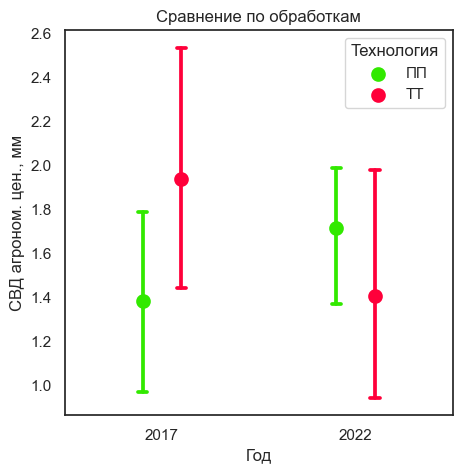

In [21]:
stats, aov, fig = agrofiz_plot_by_groups(agrofiz_urozaynoe, 'СВД агроном. цен., мм','Год' )
aov


In [22]:
stats

СВД агроном. цен., мм                    
                                     sem       std      mean
Год  Тип обработки                                          
2017 ПП                         0.235205  0.525935  1.382911
     ТТ                         0.303731  0.679163  1.936104
2022 ПП                         0.185826  0.415520  1.712804
     ТТ                         0.312961  0.699802  1.406118

### Эрозионно опасные (<1 мм), %

Эрозионноопасныемм ~ Типобработки * Год


,df,sum_sq,mean_sq,F,PR(>F)
Типобработки,1.0,13.445043,13.445043,5.292141,0.035213
Год,1.0,0.049889,0.049889,0.019637,0.890304
Типобработки:Год,1.0,0.183022,0.183022,0.072040,0.791820
Residual,16.0,40.649083,2.540568,NaN,NaN


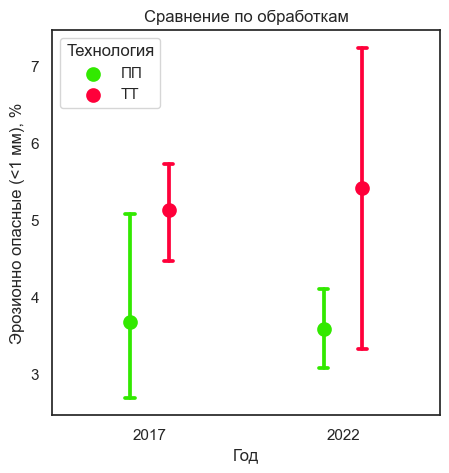

In [23]:
stats, aov, fig = agrofiz_plot_by_groups(agrofiz_urozaynoe, 'Эрозионно опасные (<1 мм), %', 'Год')
aov

In [24]:
stats

Эрозионно опасные (<1 мм), %                    
                                            sem       std      mean
Год  Тип обработки                                                 
2017 ПП                                0.674660  1.508585  3.681324
     ТТ                                0.363529  0.812876  5.129821
2022 ПП                                0.290729  0.650090  3.589891
     ТТ                                1.166453  2.608267  5.421033

## Урожайное/Архангельский 2022

In [25]:
agrofiz_urozaynoe_archang = agrofiz[
    (agrofiz['region'].isin(['архангельский','урожайное' ])) & 
    agrofiz['GPS №'].isin(['XX', 'XVIII', 'Архангельский']) &
    agrofiz['Год'].isin([2022,2019])
    ]
agrofiz_urozaynoe_archang
agrofiz_urozaynoe_archang['Хозяйство'] = agrofiz_urozaynoe_archang['region']

In [26]:
agrofiz_urozaynoe_archang['Хозяйство'].ndim

1

## СВД

СВДмм ~ Типобработки * Хозяйство


,df,sum_sq,mean_sq,F,PR(>F)
Типобработки,1.0,2.731472,2.731472,1.006744,0.330618
Хозяйство,1.0,6.667656,6.667656,2.457510,0.136526
Типобработки:Хозяйство,1.0,5.999114,5.999114,2.211105,0.156461
Residual,16.0,43.410801,2.713175,NaN,NaN


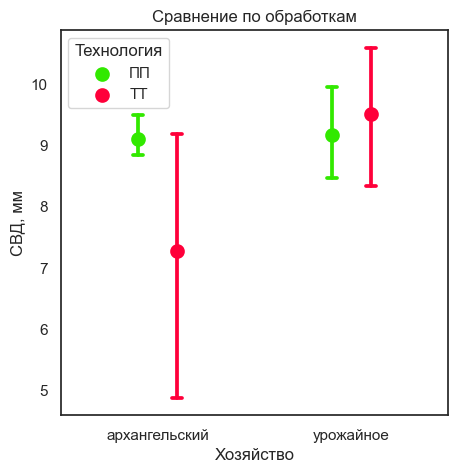

In [27]:
stats, aov, fig = agrofiz_plot_by_groups(agrofiz_urozaynoe_archang,'СВД, мм','Хозяйство')
aov


In [28]:
stats

СВД, мм                    
                                  sem       std      mean
Хозяйство     Тип обработки                              
архангельский ПП             0.190303  0.425531  9.111387
              ТТ             1.219793  2.727541  7.276905
урожайное     ПП             0.432586  0.967291  9.170809
              ТТ             0.677715  1.515418  9.527056

## СВД агроном. цен., мм

СВДагрономценмм ~ Типобработки * Хозяйство


,df,sum_sq,mean_sq,F,PR(>F)
Типобработки,1.0,0.107269,0.107269,0.310444,0.585119
Хозяйство,1.0,0.049880,0.049880,0.144357,0.708984
Типобработки:Хозяйство,1.0,0.128343,0.128343,0.371436,0.550780
Residual,16.0,5.528535,0.345533,NaN,NaN


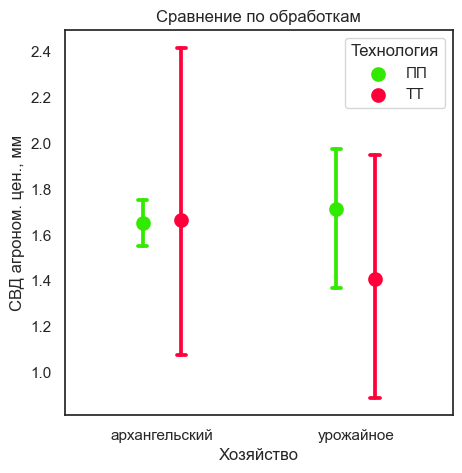

In [31]:
stats, aov, fig = agrofiz_plot_by_groups(agrofiz_urozaynoe_archang,'СВД агроном. цен., мм', 'Хозяйство')
aov


In [32]:
stats

СВД агроном. цен., мм                    
                                              sem       std      mean
Хозяйство     Тип обработки                                          
архангельский ПП                         0.057777  0.129193  1.652469
              ТТ                         0.374984  0.838489  1.666212
урожайное     ПП                         0.185826  0.415520  1.712804
              ТТ                         0.312961  0.699802  1.406118

### Эрозионно опасные (<1 мм), %

Эрозионноопасныемм ~ Типобработки * Хозяйство


,df,sum_sq,mean_sq,F,PR(>F)
Типобработки,1.0,214.736735,214.736735,9.652173,0.006783
Хозяйство,1.0,334.111636,334.111636,15.017939,0.001342
Типобработки:Хозяйство,1.0,111.499658,111.499658,5.011783,0.039740
Residual,16.0,355.960037,22.247502,NaN,NaN


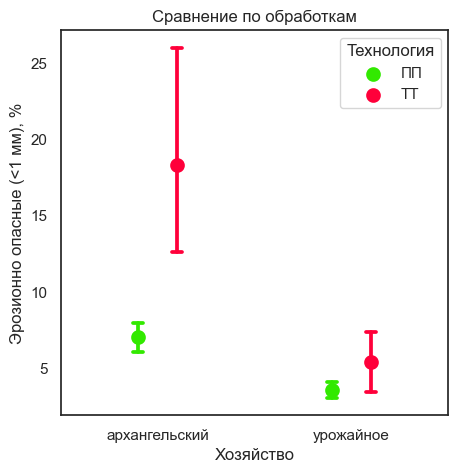

In [35]:
stats, aov, fig = agrofiz_plot_by_groups(agrofiz_urozaynoe_archang, 'Эрозионно опасные (<1 мм), %', 'Хозяйство')
aov

In [36]:
stats

Эрозионно опасные (<1 мм), %                     
                                                     sem       std       mean
Хозяйство     Тип обработки                                                  
архангельский ПП                                0.577741  1.291868   7.042103
              ТТ                                4.002385  8.949604  18.317806
урожайное     ПП                                0.290729  0.650090   3.589891
              ТТ                                1.166453  2.608267   5.421033

### СВД Водопрочные

In [60]:
svd_vis = agrofiz_urozaynoe_archang[[
    'Хозяйство',
    'Тип обработки',
    'СВД водоустойчивые >10, мм',
    'СВД водоустойчивые 10-7, мм',
    'СВД водоустойчивые 7-5, мм',
    'СВД водоустойчивые 5-3, мм']]
svd_vis.groupby(['Хозяйство','Тип обработки']).agg({'mean','std','sem'}).round(2)

СВД водоустойчивые >10, мм              \
                                                   sem   std  mean   
Хозяйство     Тип обработки                                          
архангельский ПП                                  0.55  1.22  4.91   
              ТТ                                  0.33  0.73  2.46   
урожайное     ПП                                  0.58  1.00  5.55   
              ТТ                                  0.43  0.74  3.48   

                            СВД водоустойчивые 10-7, мм              \
                                                    sem   std  mean   
Хозяйство     Тип обработки                                           
архангельский ПП                                   0.34  0.75  3.35   
              ТТ                                   0.12  0.26  1.62   
урожайное     ПП                                   0.28  0.48  3.50   
              ТТ                                   0.32  0.56  2.89   

                            СВД водоустойчивые 7-5, мм              \
                                                   sem   std  mean   
Хозяйство     Тип обработки                                          
архангельский ПП                                  0.10  0.22  2.10   
              ТТ                                  0.05  0.11  1.31   
урожайное     ПП                                  0.17  0.29  2.64   
              ТТ                                  0.14  0.25  2.08   

                            СВД водоустойчивые 5-3, мм              
                                                   sem   std  mean  
Хозяйство     Тип обработки                                         
архангельский ПП                                  0.07  0.17  1.42  
              ТТ                                  0.03  0.06  0.91  
урожайное     ПП                                  0.26  0.45  1.97  
              ТТ                                  0.09  0.15  1.27

СВДводоустойчивыемм ~ Типобработки * Хозяйство
СВДводоустойчивыемм ~ Типобработки * Хозяйство
СВДводоустойчивыемм ~ Типобработки * Хозяйство
СВДводоустойчивыемм ~ Типобработки * Хозяйство


,df,sum_sq,mean_sq,F,PR(>F),Размер агрегата
Типобработки,1.0,21.181856,21.181856,22.613470,0.000468,"СВД водоустойчивые >10, мм"
Хозяйство,1.0,2.593332,2.593332,2.768607,0.122004,"СВД водоустойчивые >10, мм"
Типобработки:Хозяйство,1.0,0.136088,0.136088,0.145286,0.709744,"СВД водоустойчивые >10, мм"
Residual,12.0,11.240303,0.936692,NaN,NaN,"СВД водоустойчивые >10, мм"
Типобработки,1.0,6.856870,6.856870,22.561666,0.000472,"СВД водоустойчивые 10-7, мм"
Хозяйство,1.0,1.861564,1.861564,6.125243,0.029229,"СВД водоустойчивые 10-7, мм"
Типобработки:Хозяйство,1.0,1.169045,1.169045,3.846596,0.073469,"СВД водоустойчивые 10-7, мм"
Residual,12.0,3.647002,0.303917,NaN,NaN,"СВД водоустойчивые 10-7, мм"
Типобработки,1.0,2.002813,2.002813,44.029655,0.000024,"СВД водоустойчивые 7-5, мм"
Хозяйство,1.0,1.589198,1.589198,34.936774,0.000071,"СВД водоустойчивые 7-5, мм"


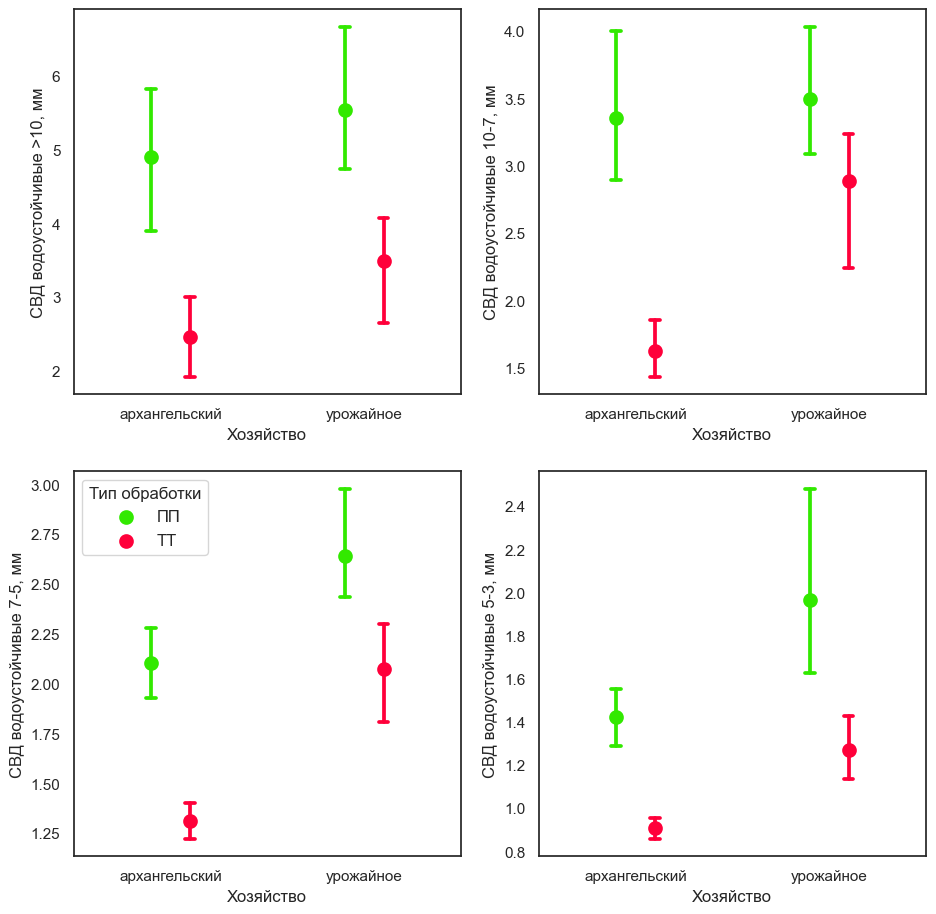

In [66]:
plot, ax  = plt.subplots(2,2, figsize = (11,11) )
stat_df = pd.DataFrame()
aggregate_list  = [
    'СВД водоустойчивые >10, мм',
    'СВД водоустойчивые 10-7, мм',
    'СВД водоустойчивые 7-5, мм',
    'СВД водоустойчивые 5-3, мм']
ax_list = [ax[0,0], ax[0,1],ax[1,0],ax[1,1]]
for n,i in enumerate(aggregate_list):
    plot = sns.pointplot(data = svd_vis,
                            x = "Хозяйство",
                            y = i,
                            hue = "Тип обработки",
                            dodge= 0.2,
                            palette = "prism",
                            scale = 1.2,
                            ci = 95,
                            join = False,
                            capsize = .05, ax = ax_list[n])
    ax_list[n].get_legend().set_visible(False)

    ld = aov_by_group(svd_vis, i,"Хозяйство")
    ld['Размер агрегата'] = i
    stat_df = stat_df.append(ld)
 
            
ax[1,0].legend( fontsize = 12, title='Тип обработки')
stat_df 


### Содержание эрозионно опасных агрегатов (<1 мм)

In [68]:
eroz_vis = agrofiz_urozaynoe_archang[[
    'Хозяйство',
    'Тип обработки',
    'Эрозионно опасные >10 (<1 мм), %',
    'Эрозионно опасные 10-7 (<1 мм), %',
    'Эрозионно опасные 7-5 (<1 мм), %',
    'Эрозионно опасные 5-3 (<1 мм), %']]
eroz_vis.groupby(['Хозяйство','Тип обработки']).agg({'mean','std','sem'}).round(2)

Эрозионно опасные >10 (<1 мм), %               \
                                                         sem   std   mean   
Хозяйство     Тип обработки                                                 
архангельский ПП                                        1.98  4.43  33.96   
              ТТ                                        2.87  6.42  53.35   
урожайное     ПП                                        3.22  5.58  20.43   
              ТТ                                        1.83  3.16  32.53   

                            Эрозионно опасные 10-7 (<1 мм), %                \
                                                          sem    std   mean   
Хозяйство     Тип обработки                                                   
архангельский ПП                                         3.64   8.14  40.38   
              ТТ                                         4.44   9.92  64.27   
урожайное     ПП                                         3.14   5.43  26.64   
              ТТ                                         5.81  10.06  34.86   

                            Эрозионно опасные 7-5 (<1 мм), %               \
                                                         sem   std   mean   
Хозяйство     Тип обработки                                                 
архангельский ПП                                        1.90  4.26  45.66   
              ТТ                                        2.33  5.22  61.07   
урожайное     ПП                                        2.64  4.57  28.18   
              ТТ                                        2.18  3.78  41.94   

                            Эрозионно опасные 5-3 (<1 мм), %                
                                                         sem    std   mean  
Хозяйство     Тип обработки                                                 
архангельский ПП                                        1.82   4.08  53.31  
              ТТ                                        2.68   5.99  70.58  
урожайное     ПП                                        6.14  10.64  33.47  
              ТТ                                        4.27   7.40  53.84

Эрозионноопасныемм ~ Типобработки * Хозяйство
Эрозионноопасныемм ~ Типобработки * Хозяйство
Эрозионноопасныемм ~ Типобработки * Хозяйство
Эрозионноопасныемм ~ Типобработки * Хозяйство


,df,sum_sq,mean_sq,F,PR(>F),Размер агрегата
Типобработки,1.0,1109.889225,1109.889225,40.883403,0.000034,"Эрозионно опасные >10 (<1 мм), %"
Хозяйство,1.0,1106.606760,1106.606760,40.762492,0.000035,"Эрозионно опасные >10 (<1 мм), %"
Типобработки:Хозяйство,1.0,49.777042,49.777042,1.833566,0.200658,"Эрозионно опасные >10 (<1 мм), %"
Residual,12.0,325.772067,27.147672,NaN,NaN,"Эрозионно опасные >10 (<1 мм), %"
Типобработки,1.0,1297.800625,1297.800625,16.928443,0.001435,"Эрозионно опасные 10-7 (<1 мм), %"
Хозяйство,1.0,1745.552344,1745.552344,22.768892,0.000455,"Эрозионно опасные 10-7 (<1 мм), %"
Типобработки:Хозяйство,1.0,230.300042,230.300042,3.004022,0.108652,"Эрозионно опасные 10-7 (<1 мм), %"
Residual,12.0,919.966933,76.663911,NaN,NaN,"Эрозионно опасные 10-7 (<1 мм), %"
Типобработки,1.0,875.494127,875.494127,41.755237,0.000031,"Эрозионно опасные 7-5 (<1 мм), %"
Хозяйство,1.0,1256.638253,1256.638253,59.933273,0.000005,"Эрозионно опасные 7-5 (<1 мм), %"


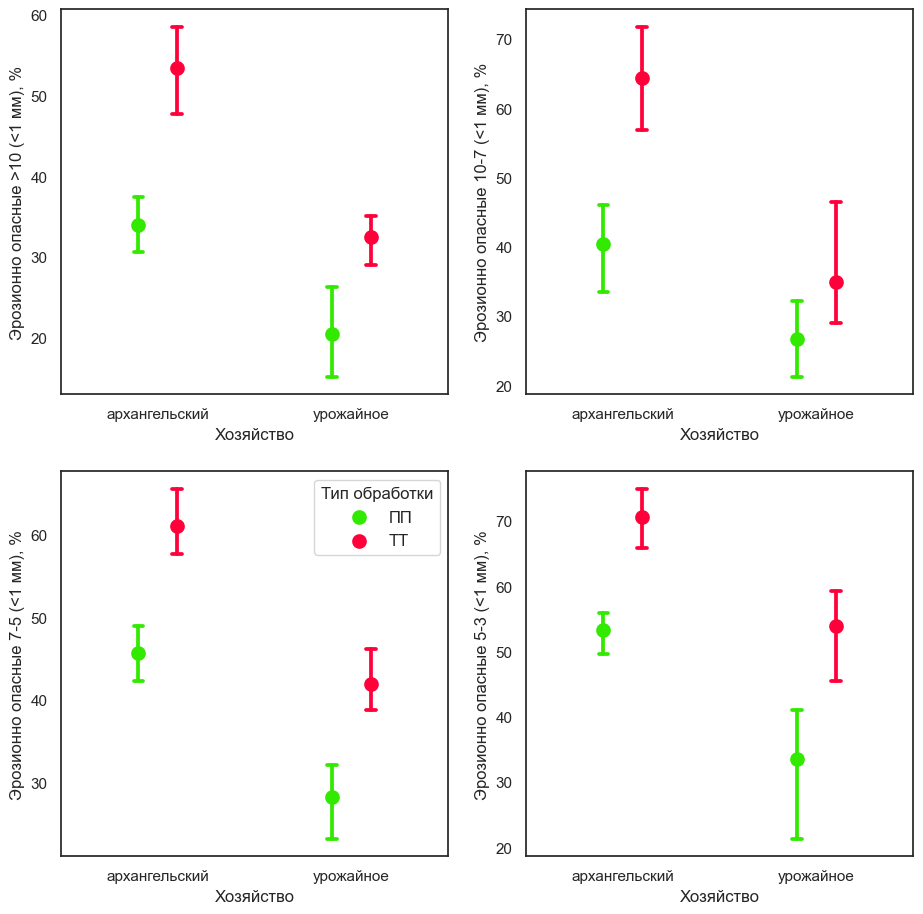

In [69]:
plot, ax  = plt.subplots(2,2, figsize = (11,11) )
stat_df = pd.DataFrame()
aggregate_list  = [
    'Эрозионно опасные >10 (<1 мм), %',
    'Эрозионно опасные 10-7 (<1 мм), %',
    'Эрозионно опасные 7-5 (<1 мм), %',
    'Эрозионно опасные 5-3 (<1 мм), %'
    ]
ax_list = [ax[0,0], ax[0,1],ax[1,0],ax[1,1]]
for n,i in enumerate(aggregate_list):
    plot = sns.pointplot(data = eroz_vis,
                            x = "Хозяйство",
                            y = i,
                            hue = "Тип обработки",
                            dodge= 0.2,
                            palette = "prism",
                            scale = 1.2,
                            ci = 95,
                            join = False,
                            capsize = .05, ax = ax_list[n])
    ax_list[n].get_legend().set_visible(False)

    ld = aov_by_group(eroz_vis, i,"Хозяйство")
    ld['Размер агрегата'] = i
    stat_df = stat_df.append(ld)
 
            
ax[1,0].legend( fontsize = 12, title='Тип обработки')
stat_df 
